<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-1-Build/blob/master/CopyPingAo_proj1_some_facts_about_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Data resource:
https://data.world/anaozp/diabetes/workspace/file?filename=diabetes.csv

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6110188/


#2) Key facts about diabetes :

•	Insulin is a hormone that regulates blood sugar. Diabetes occurs either when the pancreas does not produce enough insulin (Type 1 diabetes) or when the body cannot effectively use the insulin it produces(Type 2 diabetes (adult-onset)).
.The number of people with diabetes has risen 4 times in 34 years (1980 to 2014)

•	Diabetes can cause  blindness, kidney failure, heart attacks, stroke and lower limb amputation.

•	Almost half of all deaths before the age of 70 years are attributable to diabetes.

•	It is the seventh leading cause of death in 2016.

•	Diabetes is strongly associated to age, obesity, pregnancy, blood pressure, gene .

•	Diabetes can be treated with diet, physical activity, medication .

•	Normal blood glucose level should be between 70 to 130 before breakfast. 

•	Normal BMI range is between 18.5 and 24.9.

Insulin is a hormone that regulates blood sugar. Diabetes occurs either when the pancreas does not produce enough insulin (Type 1 diabetes) or when the body cannot effectively use the insulin it produces(Type 2 diabetes (adult-onset)). 


#3) What are our purposes?
 1.We can make a model  to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, pregancy, thickness of skin(insulin level can affect the skin protein's synthesis).

2.We maybe improve the current therapies for diabetes patients.

3.We can see clearly how some factors take so import on causing this disease.


#4) Import the pandas, mathplotlib, seanborn libraries  

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5) Input dataset from the local file.

In [0]:

df=pd.read_csv('diabetesvitaldata.txt')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Outcome '1' stands for having diabetes. '0', no diabetes.

#6) Check columns' types.

In [0]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#7) Check distribution of variables(columns)

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#8) check NaN

In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#9) Check the associations  between different variables. 
The pair plots is very useful for exploring correlations between multidimensional data, which plot all pairs of values against each other.
## The graph fits linear regression models to the scatter plots

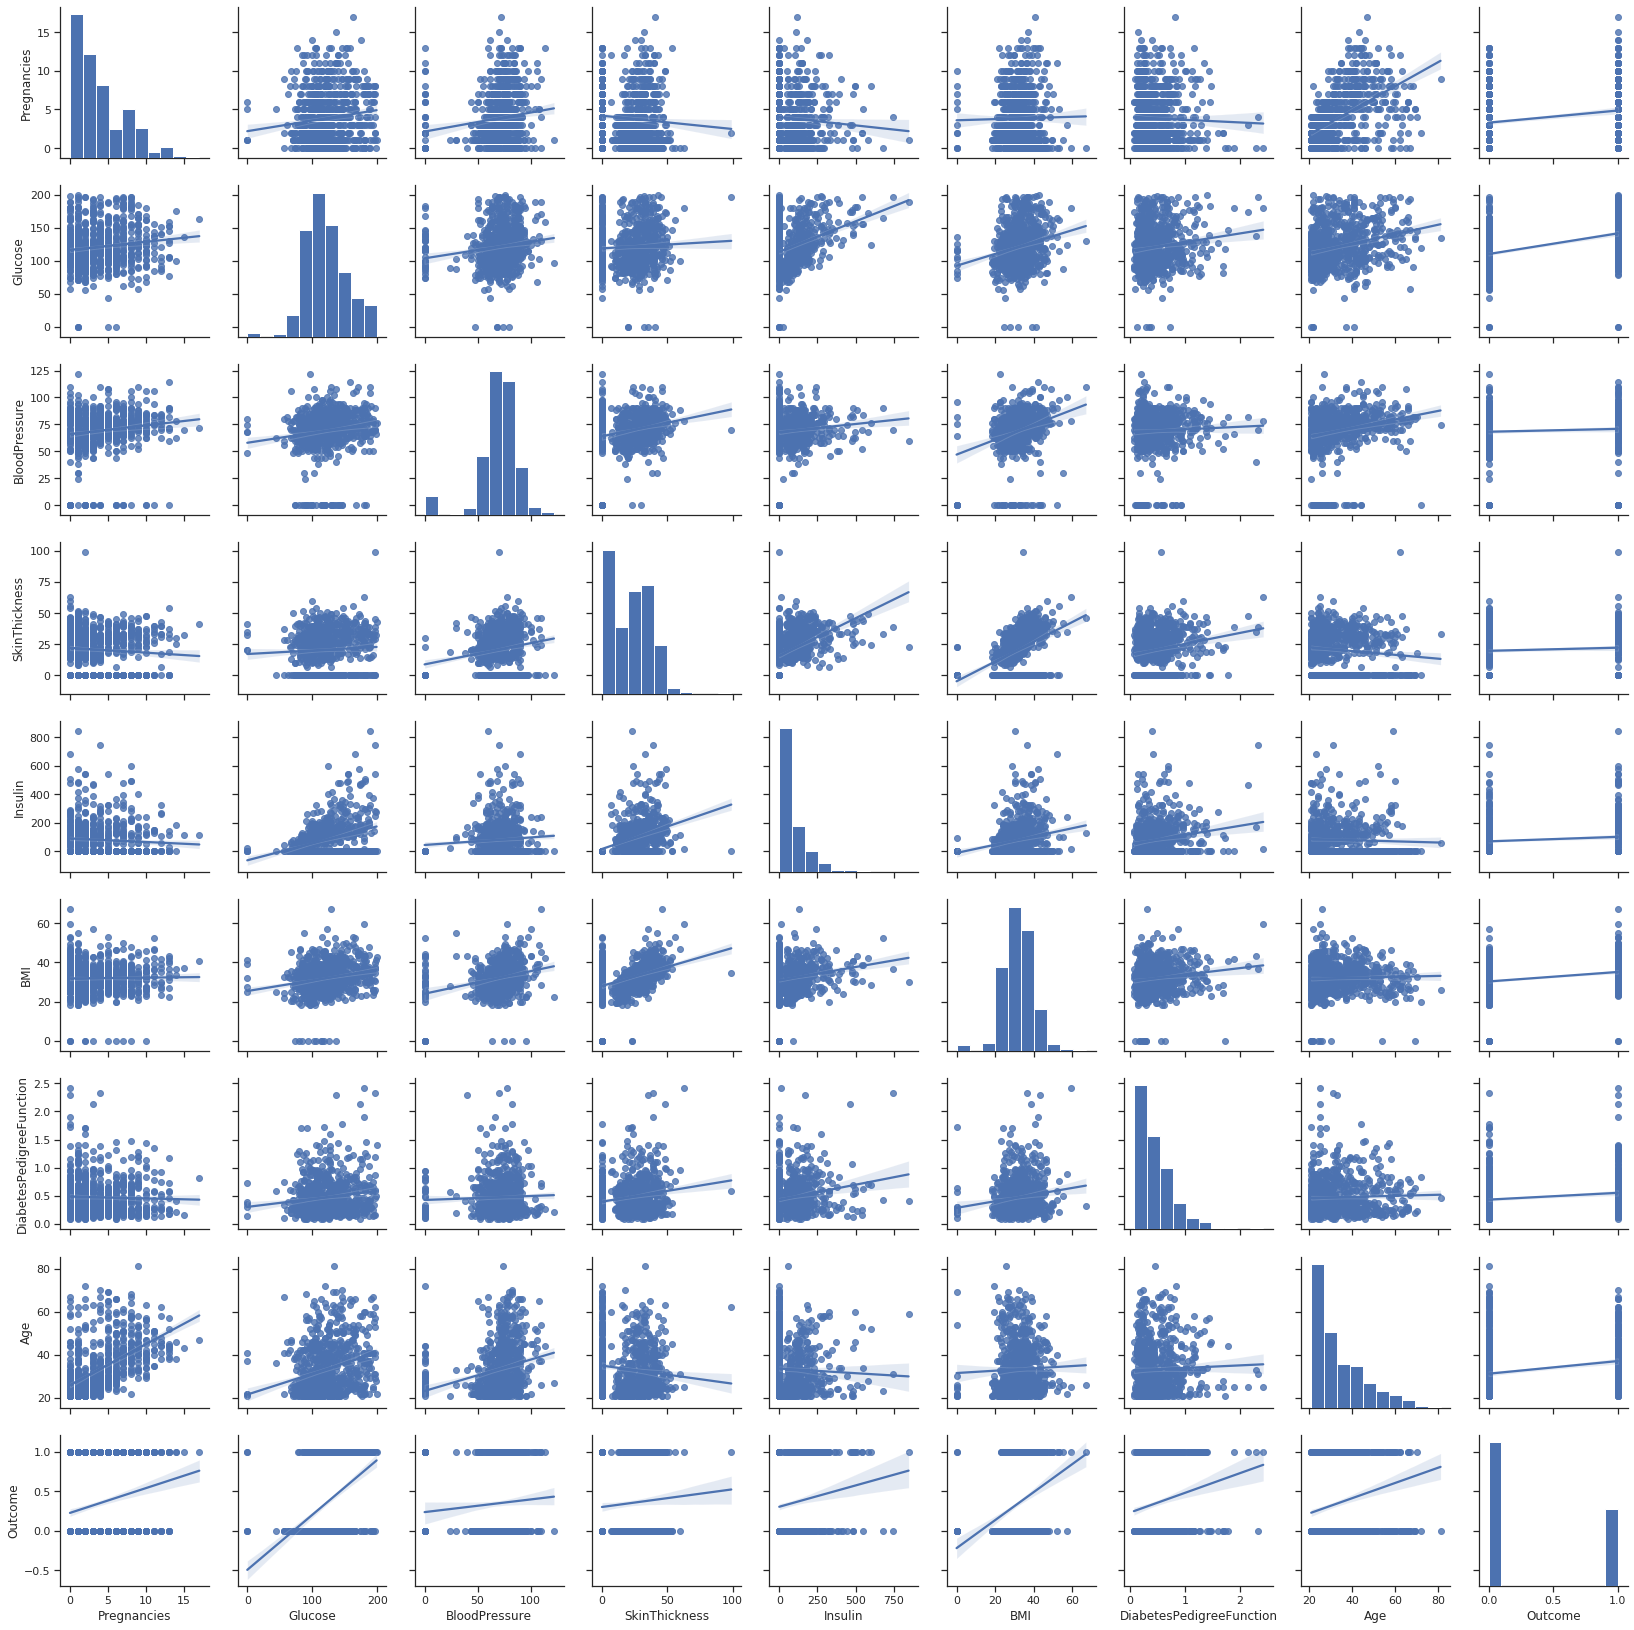

In [0]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,kind='reg')

#10) Seanborn pairplot with hue='Outcome', we find in two groups( normal: blue color, diabetes: peach color), the variables show differences.
# From the diagonal line, we can see the diabetes group all left-move.

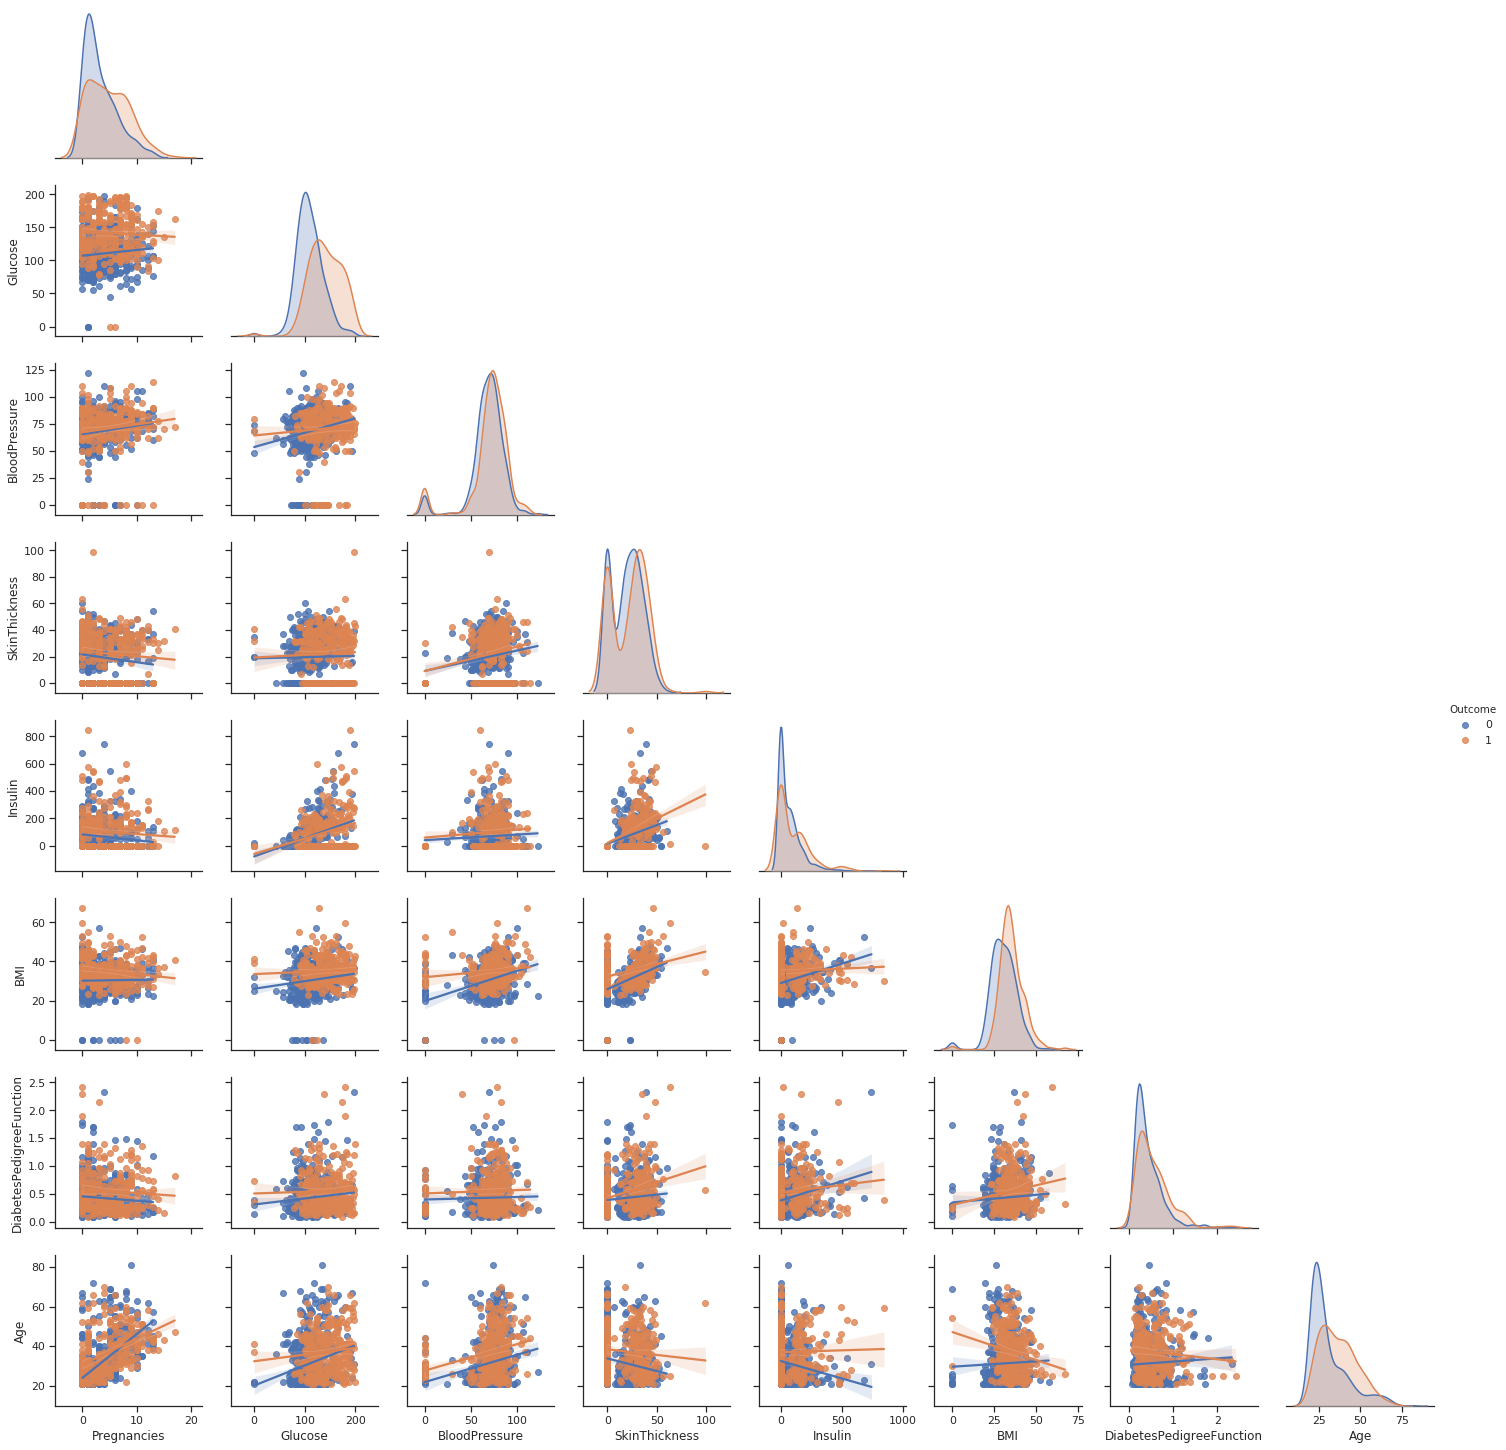

In [0]:
g = sns.pairplot(df,hue='Outcome',kind='reg', corner=True)

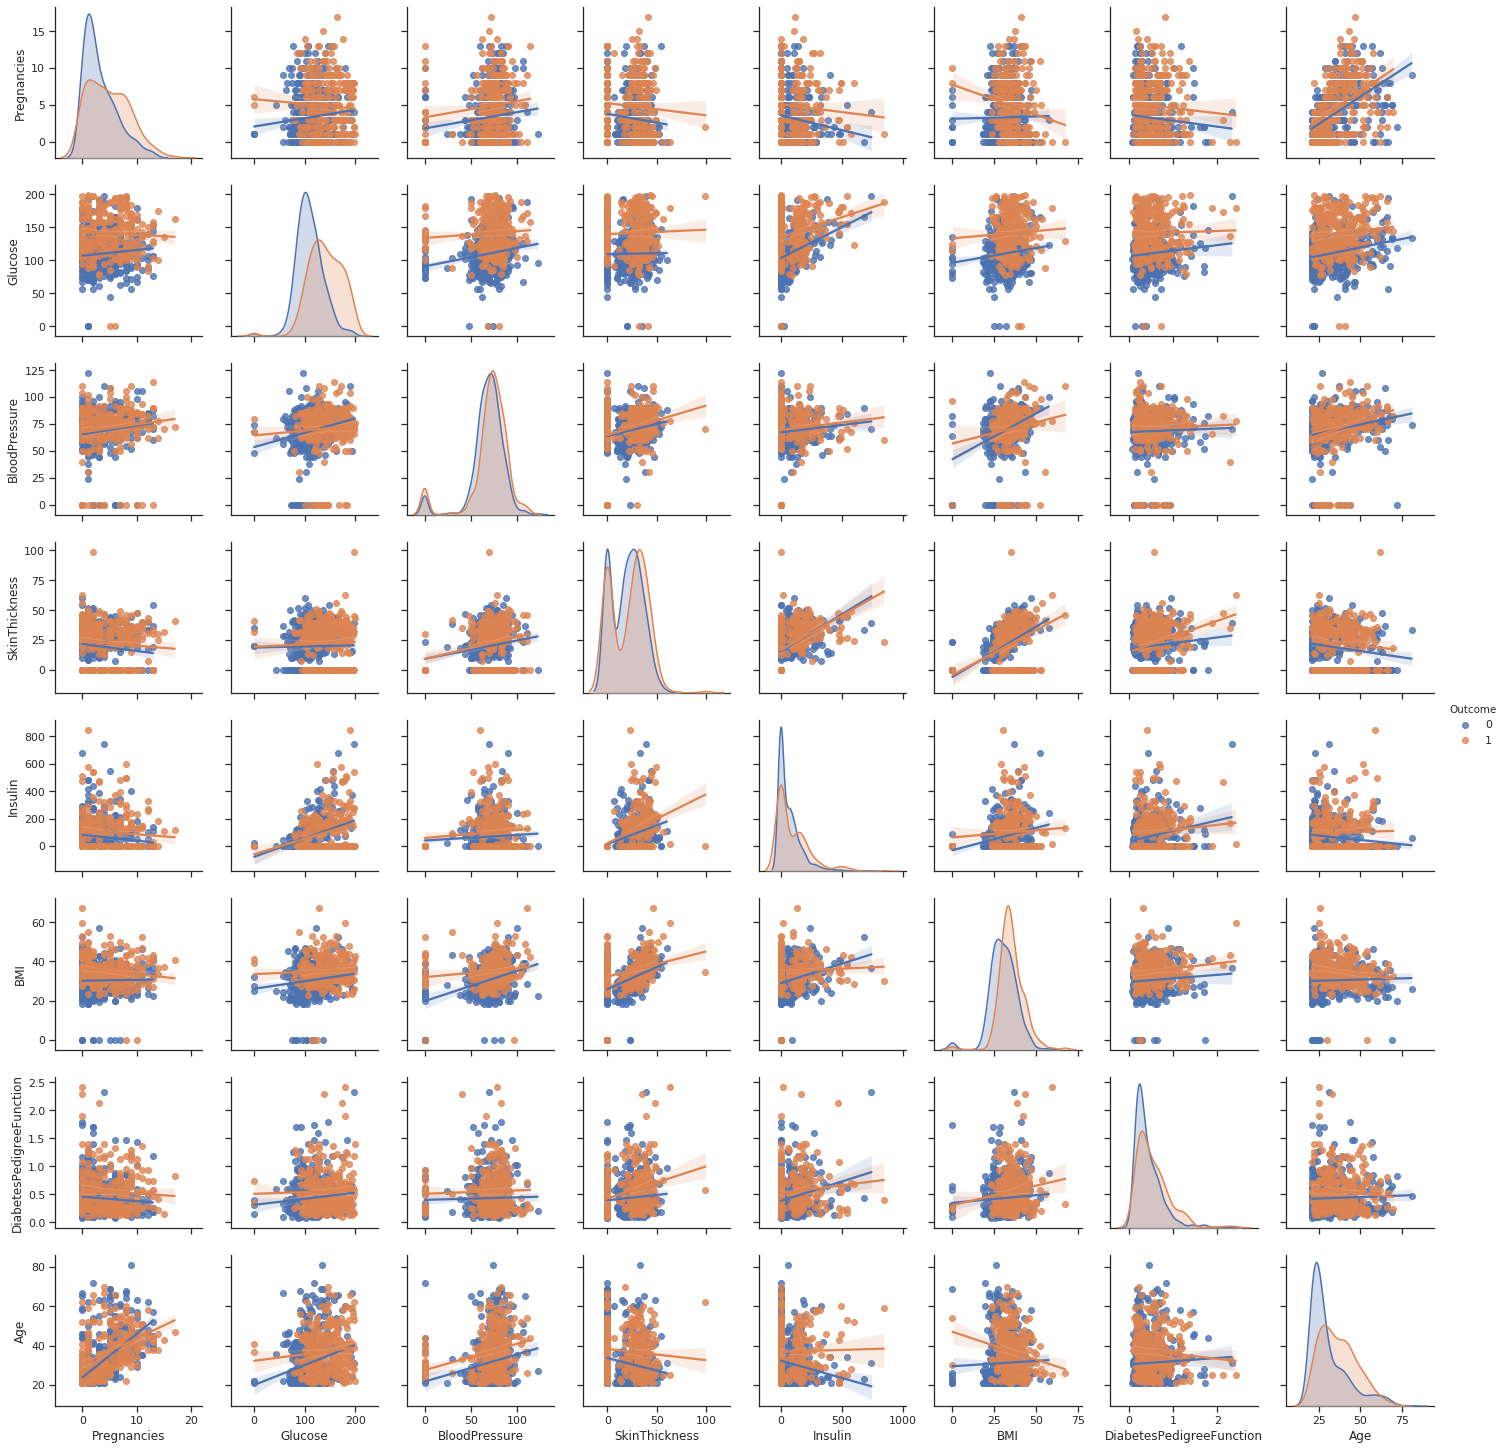

In [0]:
g=sns.pairplot(df,kind='reg',hue='Outcome',diag_kind='kde')

In [0]:
df.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#11) Normal distribution of the subjects' age.

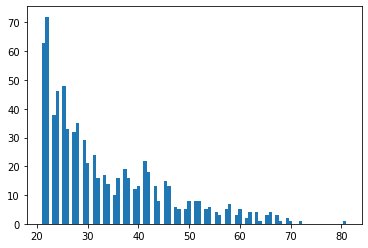

In [0]:
plt.hist(df['Age'], bins=90);

# In this dataset, younger people take a bigger ratio.

# 12) Normal distribution of blood glucose. 
According to WHO, normal blood glucose level should be between 70 to 130 before breakfast.

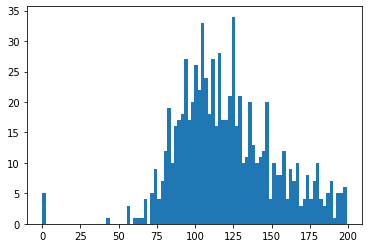

In [0]:
plt.hist(df['Glucose'], bins=90);

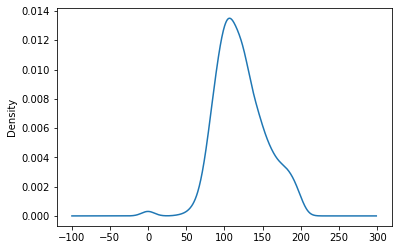

In [0]:
df['Glucose'].plot.density();

#13) According to WHO, BMI between 18.5 and 24.9 is  the healthy weight range. Mean of the BMI in our case just is  in this range. It tells us most people's BMI is normal.

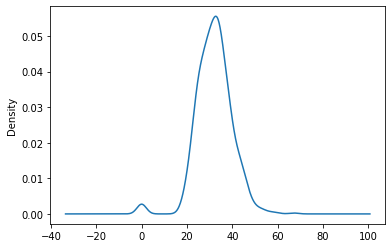

In [0]:
df['BMI'].plot.density();

#14) By seanborn pairplot, to find the correlationship between glucose level and insulin level. 
Seanborn pairplot gives us more information than mathplotlib, scatter plot.

We can see higher glucose level can stimulate body to secret more insulin.

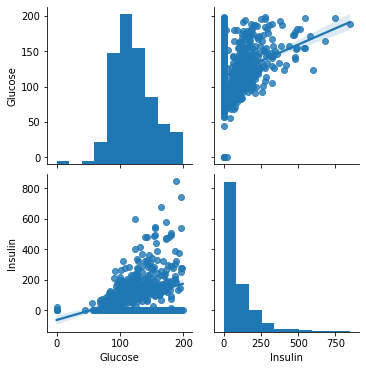

In [0]:
g=sns.pairplot(df, kind='reg', vars=['Glucose', 'Insulin'])

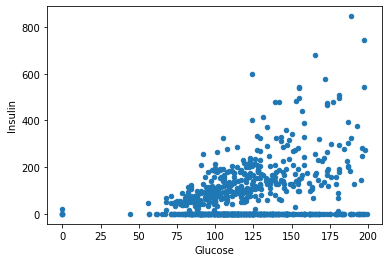

In [0]:
 df.plot.scatter(x='Glucose', y='Insulin');

#15) We can see BMI affect glucose value. That means overwight and obesity are  positively correlated with diabetes. 

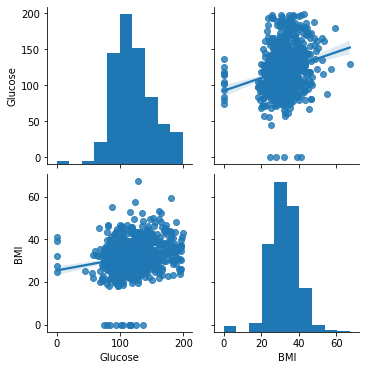

In [0]:
g=sns.pairplot(df,kind='reg', vars=['Glucose', 'BMI'])

#16) Using seanborn jointplot to find realtionship between SkinThickness and Glucose level.

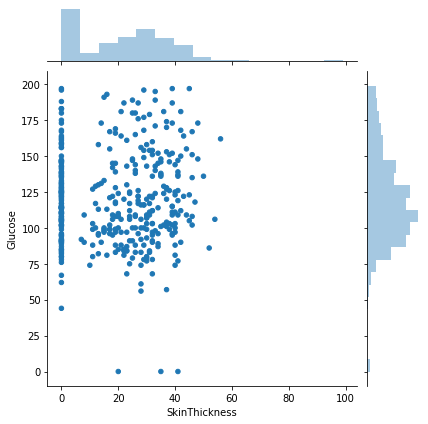

In [23]:
sns.jointplot(x='SkinThickness', y='Glucose', data=df,  kind="scatter", sizes=(20,0))

#17) df.corr() can find the pairwise correlation of all columns.

In [0]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#Conclusion: we can see blood sugar level shows positive relationship with insulin (r= 33.13%), age (r= 26,35%), BMI (r= 22.11%), blood pressure (r= 15.26%), pregnancy (r= 12.95%),  SkinThickness(r= 5.73%). 

# 18) Seanborn heatmap  also can give us clear relationship beween two different variables. 
Blue color shows postive relationship, peach color shows negative relationship.

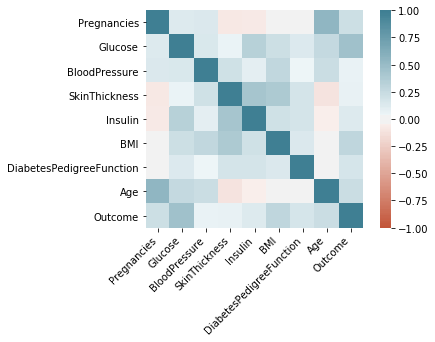

In [21]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# We can get the conclusion that all the factors(insulin level, age, BMI, blood pressure, pregnancy, SkinThickness, and genetic (DiabetesPedigreeFuction) positively related to diabetes.

#19 Do something about PCA and cluster.


In [0]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [0]:
K = range(1,11)

# The average distance from each centroid, to the points in its cluster
distortion = []
for k in K:
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  distortion.append(kmeans.inertia_)

distortion

[11615987.397493895,
 5142544.699735325,
 2913492.724649518,
 2150703.321398098,
 1737485.2249923905,
 1467131.9702286916,
 1301403.0697417264,
 1146817.8530892057,
 1003248.5737847391,
 930586.9904356962]

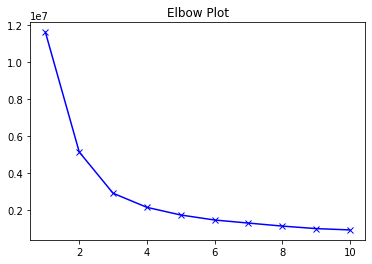

In [0]:
plt.plot(K, distortion, 'bx-')
plt.title("Elbow Plot")

plt.show()

#After Elbow Plots, we can judge there are two clusters, one is with diabetes, one is not.

In [0]:
scaler = StandardScaler()
# Use StandardScaler
Z = scaler.fit_transform(df)

Z[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ,  1.36589591])

In [0]:
pca = PCA(.9)
transformed_data = pca.fit_transform(Z)

In [0]:
len(transformed_data.T)

7

In [0]:
# Cumulative explained variance of the first 7 Principal Components
pca.explained_variance_ratio_.sum()

0.9107676312907247

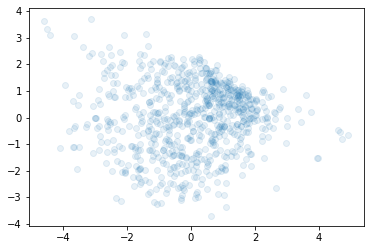

In [0]:
plt.scatter(transformed_data[:,0:1], transformed_data[:,1:2],alpha=0.1)
plt.show()

#Conclusion: From the elbow plot test we find two clusters, which just matches two groups : with diabetes or normal. But graphing pc1 and pc2,  we can't very clearly distinguish the two clusters.